In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

%matplotlib inline

import matplotlib

/Users/tomas/miniconda2/envs/py27_nb/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
df = pd.read_csv('examples/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
print(df.count())
df.head()

ds    2905
y     2905
dtype: int64


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
m = Prophet()
m.fit(df);

In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


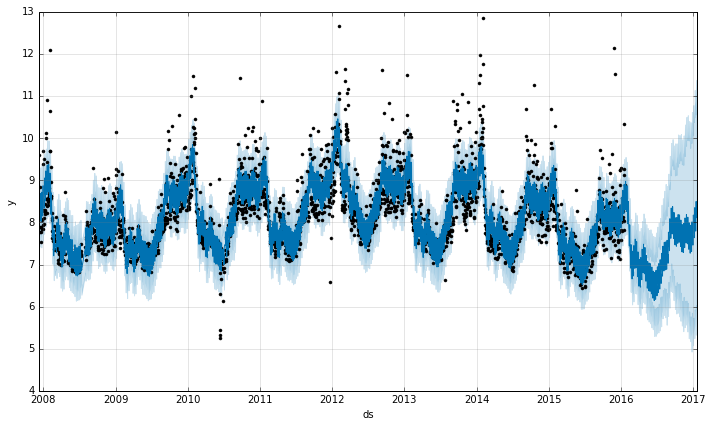

In [7]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
m.plot(forecast);

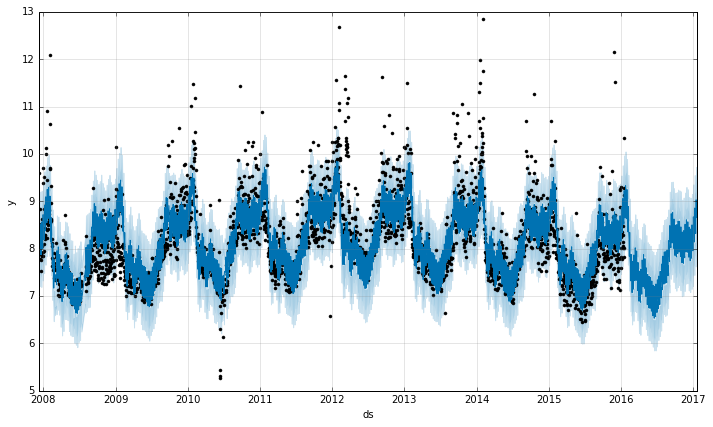

In [8]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
m.plot(forecast);

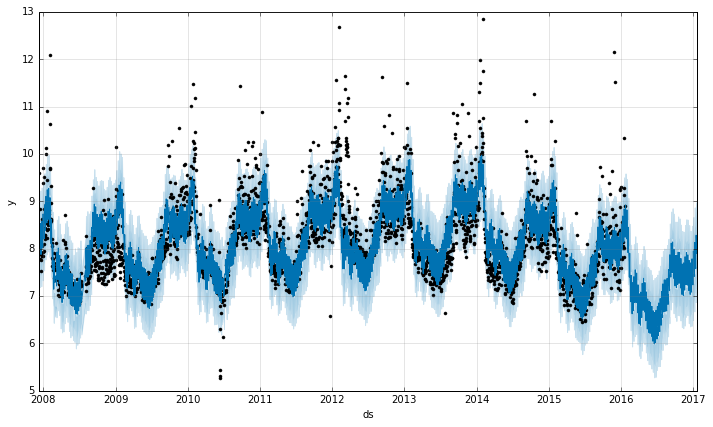

In [9]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
m.plot(forecast);